# Xception

In [1]:
import sys
sys.path.append("../src")
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers.convolutional import Conv2D
from keras.layers.core import Dense
from nnclib.utils import model_dic
model = model_dic['xception'][0]()

Using TensorFlow backend.


<class 'keras.layers.convolutional.Conv2D'>
(3, 3, 3, 32)


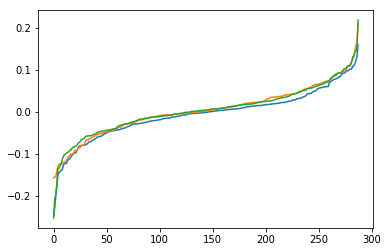

<class 'keras.layers.normalization.BatchNormalization'>
(32,)
<class 'keras.layers.core.Activation'>
(0,)
<class 'keras.layers.convolutional.Conv2D'>
(3, 3, 32, 64)


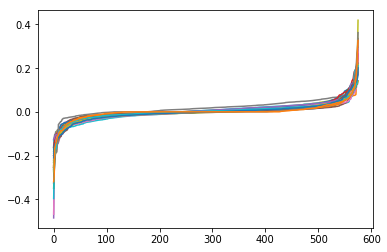

<class 'keras.layers.normalization.BatchNormalization'>
(64,)
<class 'keras.layers.core.Activation'>
(0,)
<class 'keras.layers.convolutional.SeparableConv2D'>
(3, 3, 64, 1)
<class 'keras.layers.normalization.BatchNormalization'>
(128,)
<class 'keras.layers.core.Activation'>
(0,)
<class 'keras.layers.convolutional.SeparableConv2D'>
(3, 3, 128, 1)
<class 'keras.layers.normalization.BatchNormalization'>
(128,)
<class 'keras.layers.convolutional.Conv2D'>
(1, 1, 64, 128)


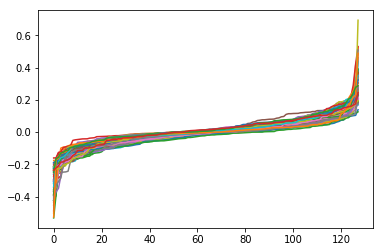

<class 'keras.layers.pooling.MaxPooling2D'>
(0,)
<class 'keras.layers.normalization.BatchNormalization'>
(128,)
<class 'keras.layers.merge.Add'>
(0,)
<class 'keras.layers.core.Activation'>
(0,)
<class 'keras.layers.convolutional.SeparableConv2D'>
(3, 3, 128, 1)
<class 'keras.layers.normalization.BatchNormalization'>
(256,)
<class 'keras.layers.core.Activation'>
(0,)
<class 'keras.layers.convolutional.SeparableConv2D'>
(3, 3, 256, 1)
<class 'keras.layers.normalization.BatchNormalization'>
(256,)
<class 'keras.layers.convolutional.Conv2D'>
(1, 1, 128, 256)


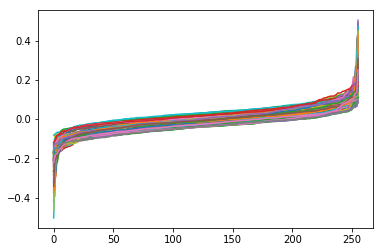

<class 'keras.layers.pooling.MaxPooling2D'>
(0,)
<class 'keras.layers.normalization.BatchNormalization'>
(256,)
<class 'keras.layers.merge.Add'>
(0,)
<class 'keras.layers.core.Activation'>
(0,)
<class 'keras.layers.convolutional.SeparableConv2D'>
(3, 3, 256, 1)
<class 'keras.layers.normalization.BatchNormalization'>
(728,)
<class 'keras.layers.core.Activation'>
(0,)
<class 'keras.layers.convolutional.SeparableConv2D'>
(3, 3, 728, 1)
<class 'keras.layers.normalization.BatchNormalization'>
(728,)
<class 'keras.layers.convolutional.Conv2D'>
(1, 1, 256, 728)


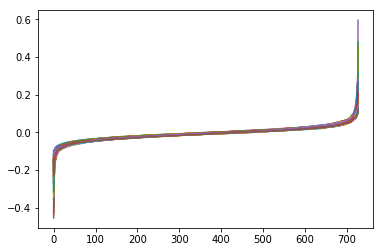

<class 'keras.layers.pooling.MaxPooling2D'>
(0,)
<class 'keras.layers.normalization.BatchNormalization'>
(728,)
<class 'keras.layers.merge.Add'>
(0,)
<class 'keras.layers.core.Activation'>
(0,)
<class 'keras.layers.convolutional.SeparableConv2D'>
(3, 3, 728, 1)
<class 'keras.layers.normalization.BatchNormalization'>
(728,)
<class 'keras.layers.core.Activation'>
(0,)
<class 'keras.layers.convolutional.SeparableConv2D'>
(3, 3, 728, 1)
<class 'keras.layers.normalization.BatchNormalization'>
(728,)
<class 'keras.layers.core.Activation'>
(0,)
<class 'keras.layers.convolutional.SeparableConv2D'>
(3, 3, 728, 1)
<class 'keras.layers.normalization.BatchNormalization'>
(728,)
<class 'keras.layers.merge.Add'>
(0,)
<class 'keras.layers.core.Activation'>
(0,)
<class 'keras.layers.convolutional.SeparableConv2D'>
(3, 3, 728, 1)
<class 'keras.layers.normalization.BatchNormalization'>
(728,)
<class 'keras.layers.core.Activation'>
(0,)
<class 'keras.layers.convolutional.SeparableConv2D'>
(3, 3, 728, 1)


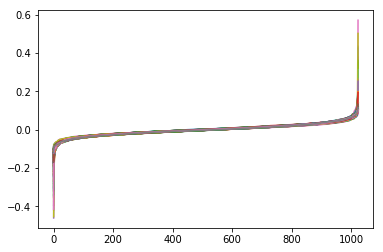

<class 'keras.layers.pooling.MaxPooling2D'>
(0,)
<class 'keras.layers.normalization.BatchNormalization'>
(1024,)
<class 'keras.layers.merge.Add'>
(0,)
<class 'keras.layers.convolutional.SeparableConv2D'>
(3, 3, 1024, 1)
<class 'keras.layers.normalization.BatchNormalization'>
(1536,)
<class 'keras.layers.core.Activation'>
(0,)
<class 'keras.layers.convolutional.SeparableConv2D'>
(3, 3, 1536, 1)
<class 'keras.layers.normalization.BatchNormalization'>
(2048,)
<class 'keras.layers.core.Activation'>
(0,)
<class 'keras.layers.pooling.GlobalAveragePooling2D'>
(0,)
<class 'keras.layers.core.Dense'>
(2048, 1000)


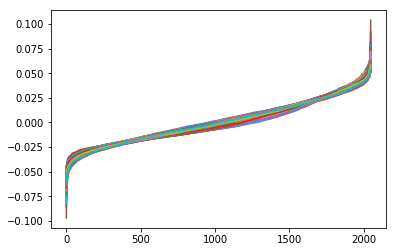

In [2]:
def proc_weights(p):
    a = np.argsort(p, axis=0)
    p = np.take_along_axis(p, a, axis=0)
    norm = np.linalg.norm(p, axis=0)
    p /= norm[np.newaxis, :]
    plt.plot(p)
    plt.show()


def process(model):
    # skip input layer
    for layer in model.layers[1:]:
        print(type(layer))
        weights = layer.get_weights()
        if weights:
            weights = weights[0]
        print(np.shape(weights))
        if isinstance(layer, Conv2D):
            x, y, inch, outch = np.shape(weights)
            proc_weights(np.reshape(weights, (x * y * outch, inch)))
        elif isinstance(layer, Dense):
            proc_weights(weights)


process(model)